In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, Subset
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import os
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedGroupKFold

# Data loading

In [2]:
training_data_path = Path("data/CMI/train.csv")
training_data_demo_path = Path("data/CMI/train_demographics.csv")

test_data_path = Path("data/CMI/test.csv")
test_data_demo_path = Path("data/CMI/test_demographics.csv")


train_df = pd.read_csv(training_data_path)
train_demo_df = pd.read_csv(training_data_demo_path)
test_df = pd.read_csv(test_data_path)
test_demo_df = pd.read_csv(test_data_demo_path)


# Data visualization

In [3]:
train_df.head(60)

,row_id,sequence_type,sequence_id,sequence_counter,subject,orientation,behavior,phase,gesture,acc_x,...,tof_5_v54,tof_5_v55,tof_5_v56,tof_5_v57,tof_5_v58,tof_5_v59,tof_5_v60,tof_5_v61,tof_5_v62,tof_5_v63
0,SEQ_000007_000000,Target,SEQ_000007,0,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.683594,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,SEQ_000007_000001,Target,SEQ_000007,1,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.949219,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,SEQ_000007_000002,Target,SEQ_000007,2,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.722656,...,-1.0,-1.0,112.0,119.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,SEQ_000007_000003,Target,SEQ_000007,3,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.601562,...,-1.0,-1.0,101.0,111.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,SEQ_000007_000004,Target,SEQ_000007,4,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.566406,...,-1.0,-1.0,101.0,109.0,125.0,-1.0,-1.0,-1.0,-1.0,-1.0
5,SEQ_000007_000005,Target,SEQ_000007,5,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,3.996094,...,-1.0,-1.0,118.0,114.0,119.0,-1.0,-1.0,-1.0,-1.0,-1.0
6,SEQ_000007_000006,Target,SEQ_000007,6,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,4.035156,...,-1.0,-1.0,104.0,118.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
7,SEQ_000007_000007,Target,SEQ_000007,7,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,3.730469,...,-1.0,-1.0,105.0,119.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
8,SEQ_000007_000008,Target,SEQ_000007,8,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,4.535156,...,-1.0,-1.0,103.0,122.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
9,SEQ_000007_000009,Target,SEQ_000007,9,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,3.921875,...,-1.0,-1.0,104.0,123.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


# Dataset

In [4]:
sgkf = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=42)
folds = sgkf.get_n_splits(train_df, train_df['gesture'], train_df['sequence_id'])
print(folds)
folds = enumerate(sgkf.split(train_df, train_df['gesture'], train_df['sequence_id']))
for fold, (train_idx, val_idx) in folds:
    print(f"Fold {fold}:")
    print(f"  Train indices: {train_idx}")
    print(f"  Validation indices: {val_idx}")
    print()

5
Fold 0:
  Train indices: [     0      1      2 ... 574942 574943 574944]
  Validation indices: [   178    179    180 ... 573813 573814 573815]

Fold 1:
  Train indices: [     0      1      2 ... 574942 574943 574944]
  Validation indices: [   125    126    127 ... 574889 574890 574891]

Fold 2:
  Train indices: [     0      1      2 ... 574889 574890 574891]
  Validation indices: [    57     58     59 ... 574942 574943 574944]

Fold 0:
  Train indices: [     0      1      2 ... 574942 574943 574944]
  Validation indices: [   178    179    180 ... 573813 573814 573815]

Fold 1:
  Train indices: [     0      1      2 ... 574942 574943 574944]
  Validation indices: [   125    126    127 ... 574889 574890 574891]

Fold 2:
  Train indices: [     0      1      2 ... 574889 574890 574891]
  Validation indices: [    57     58     59 ... 574942 574943 574944]

Fold 3:
  Train indices: [     0      1      2 ... 574942 574943 574944]
  Validation indices: [   676    677    678 ... 574679 574680

In [5]:
class CMIIMUDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform

        excluded_cols = {
            'gesture', 'sequence_type', 'behavior', 'orientation',  # train-only
            'row_id', 'subject', 'phase',  # metadata
            'sequence_id', 'sequence_counter'  # identifiers
        }
        
        thermal_tof_cols = [col for col in df.columns if col.startswith('thm_') or col.startswith('tof_')]
        excluded_cols.update(thermal_tof_cols)

        # Extract features and labels
        self.features = df.drop(columns=excluded_cols).values
        self.labels = df['gesture'].values

        # fill missing values forward and backward
        self.features = pd.DataFrame(self.features).fillna(method='ffill').fillna(method='bfill').fillna(0).values
        
        # Standardize features
        self.scaler = StandardScaler()
        self.features = self.scaler.fit_transform(self.features)

        # Encode labels
        self.label_encoder = LabelEncoder()
        self.labels = self.label_encoder.fit_transform(self.labels)

    def print(self):
        self.feat = pd.DataFrame(self.features, columns=[f'feat_{i}' for i in range(self.features.shape[1])])
        self.lab = pd.DataFrame(self.labels, columns=['gesture'])
        print(self.feat.head())
        print(self.lab.head())

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        feature = self.features[idx]
        label = self.labels[idx]

        if self.transform:
            feature = self.transform(feature)

        return torch.tensor(feature, dtype=torch.float32), torch.tensor(label, dtype=torch.long)

In [6]:
dataset = CMIIMUDataset(train_df)
dataset.print()

# Print unique gestures and their encoded values
print("\nUnique gestures and their encoded values:")
for gesture, encoded in zip(np.unique(train_df['gesture']), np.unique(dataset.labels)):
    print(f"Gesture: {gesture} -> Encoded: {encoded}")

print("\nNumber of unique gestures:", len(np.unique(train_df['gesture'])))

/tmp/ipykernel_1180/1726927483.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.features = pd.DataFrame(self.features).fillna(method='ffill').fillna(method='bfill').fillna(0).values


     feat_0    feat_1    feat_2    feat_3    feat_4    feat_5    feat_6
0  0.872408  0.884131  0.625816 -0.998489 -0.506171 -0.712894 -1.234357
1  0.918354  0.884131  0.588013 -0.958165 -0.474216 -0.678535 -1.263651
2  0.706192  0.723320  0.964767 -0.623125 -0.332515 -0.546604 -1.345239
3  0.858219  0.347835  1.134562 -0.275095 -0.310906 -0.328103 -1.385549
4  0.679165 -0.302434  1.655482 -0.115424 -0.213208 -0.006864 -1.442805
   gesture
0        1
1        1
2        1
3        1
4        1

Unique gestures and their encoded values:
Gesture: Above ear - pull hair -> Encoded: 0
Gesture: Cheek - pinch skin -> Encoded: 1
Gesture: Drink from bottle/cup -> Encoded: 2
Gesture: Eyebrow - pull hair -> Encoded: 3
Gesture: Eyelash - pull hair -> Encoded: 4
Gesture: Feel around in tray and pull out an object -> Encoded: 5
Gesture: Forehead - pull hairline -> Encoded: 6
Gesture: Forehead - scratch -> Encoded: 7
Gesture: Glasses on/off -> Encoded: 8
Gesture: Neck - pinch skin -> Encoded: 9
Gestur

In [7]:
print("\nChecking for NaN values in features:")
print("NaN values in features:", np.isnan(dataset.features).any())
print("Number of NaN values:", np.isnan(dataset.features).sum())

print("\nChecking feature statistics:")
print("Min value:", dataset.features.min())
print("Max value:", dataset.features.max())
print("Mean value:", dataset.features.mean())
print("Std value:", dataset.features.std())


Checking for NaN values in features:
NaN values in features: False
Number of NaN values: 0

Checking feature statistics:
Min value: -6.954115397188624
Max value: 7.729836034546079
Mean value: -1.3128201786039423e-17
Std value: 1.0


In [8]:
print(dataset.features.shape)
print(dataset.labels.shape)

(574945, 7)
(574945,)


# Model

In [9]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")
if device == "cuda":
    print(f"GPU: {torch.cuda.get_device_name()}")

device = "cuda"

Using cuda device
GPU: NVIDIA GeForce RTX 3060


In [10]:
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [11]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout_rate=0.2):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # Batch normalization dla danych wejściowych
        self.batch_norm_input = nn.BatchNorm1d(input_size)
        
        # LSTM z dropout
        self.lstm = nn.LSTM(
            input_size, 
            hidden_size, 
            num_layers, 
            batch_first=True,
            dropout=dropout_rate if num_layers > 1 else 0
        )
        
        # Batch normalization po LSTM
        self.batch_norm_hidden = nn.BatchNorm1d(hidden_size)
        
        # Dropout przed warstwą liniową
        self.dropout = nn.Dropout(dropout_rate)
        
        # Warstwa liniowa
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # Normalizacja danych wejściowych
        x = self.batch_norm_input(x)
        
        # Przygotowanie danych dla LSTM (batch_size, seq_length=1, input_size)
        x = x.unsqueeze(1)
        
        # Inicjalizacja stanów ukrytych
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # Forward LSTM
        out, _ = self.lstm(x, (h0, c0))
        
        # Bierzemy ostatni output
        out = out[:, -1, :]
        
        # Normalizacja po LSTM
        out = self.batch_norm_hidden(out)
        
        # Dropout
        out = self.dropout(out)
        
        # Warstwa liniowa
        out = self.fc(out)
        
        return out

In [12]:
model = SimpleNN(input_size=dataset.features.shape[1], hidden_size=128, num_classes=len(np.unique(dataset.labels)))
model.to(device)
print(model)

SimpleNN(
  (fc1): Linear(in_features=7, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=18, bias=True)
)


In [13]:
def get_fold_data_loaders(dataset, train_idx, val_idx, batch_size=32):
    train_subset = Subset(dataset, train_idx)
    val_subset = Subset(dataset, val_idx)
    
    train_dataloader = DataLoader(train_subset, batch_size=batch_size, shuffle=True, num_workers=0)
    val_dataloader = DataLoader(val_subset, batch_size=batch_size, shuffle=False, num_workers=0)
    
    return train_dataloader, val_dataloader
print(model)

SimpleNN(
  (fc1): Linear(in_features=7, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=18, bias=True)
)


In [14]:
def train_one_fold(train_dataloader, val_dataloader, model, loss_fn, optimizer, scheduler, epochs=10, batch_size=32):
    history = {
        'train_loss': [],
        'val_loss': [],
        'val_acc': [],
        'learning_rates': []
    }
    best_val_loss = float('inf')
    patience = 5
    patience_counter = 0
    
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        # Training phase
        train_loss = train_batch_loop(train_dataloader, model, loss_fn, optimizer, batch_size=batch_size)
        history['train_loss'].append(train_loss)
        
        # Validation phase
        val_loss, val_acc = test_batch_loop(val_dataloader, model, loss_fn)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        
        # Get current learning rate
        current_lr = optimizer.param_groups[0]['lr']
        history['learning_rates'].append(current_lr)
        
        # Learning rate scheduling
        scheduler.step(val_loss)
        
        # Early stopping check
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            # Save best model state
            best_model_state = {
                'epoch': t,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': val_loss,
                'accuracy': val_acc
            }
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping triggered! No improvement for {patience} epochs")
                break
        
        print(f"Learning rate: {current_lr}")
        
    # Plot training history
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history['val_acc'], label='Validation Accuracy')
    plt.title('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return history, best_model_state

In [15]:
def train_batch_loop(dataloader, model, loss_fn, optimizer, batch_size=32):
    size = len(dataloader.dataset)
    model.train()
    total_loss = 0
    num_batches = len(dataloader)
    
    for batch, (X, y) in enumerate(dataloader):
        # Monitor gradients
        grad_norms = []
            
        X, y = X.to(device), y.to(device)
        
        # Forward pass
        pred = model(X)
        loss = loss_fn(pred, y)
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        
        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        
        # Monitor gradients before step
        for name, param in model.named_parameters():
            if param.grad is not None:
                grad_norms.append(param.grad.norm().item())
        
        optimizer.step()
        
        total_loss += loss.item()
        
        if batch % 50 == 0:
            current = batch * batch_size + len(X)
            print(f"loss: {loss.item():>7f}  [{current:>5d}/{size:>5d}]")
            print(f"Average gradient norm: {np.mean(grad_norms):>7f}")
    
    avg_loss = total_loss / num_batches
    print(f"Average training loss: {avg_loss:>7f}")
    return avg_loss

def test_batch_loop(dataloader, model, loss_fn):
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    accuracy = 100 * correct
    print(f"Test Error: \n Accuracy: {accuracy:>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return test_loss, accuracy

In [16]:
def get_fold_data_loaders(dataset, train_idx, val_idx, batch_size=16):
    train_subset = Subset(dataset, train_idx)
    val_subset = Subset(dataset, val_idx)
    
    train_dataloader = DataLoader(
        train_subset, 
        batch_size=batch_size, 
        shuffle=True,  # Włącz shuffle dla danych treningowych
        num_workers=2,  # Użyj wielu workerów do ładowania danych
        pin_memory=True  # Przyspiesz transfer do GPU
    )
    
    val_dataloader = DataLoader(
        val_subset, 
        batch_size=batch_size, 
        shuffle=False,  # Nie shuffle'uj danych walidacyjnych
        num_workers=2,
        pin_memory=True
    )
    
    return train_dataloader, val_dataloader

In [17]:
def train_one_fold(train_dataloader, val_dataloader, model, loss_fn, optimizer, scheduler, epochs=10, batch_size=16):
    
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        train_batch_loop(train_dataloader, model, loss_fn, optimizer, batch_size=batch_size)  # zmniejszony batch size
        val_loss = test_batch_loop(val_dataloader, model, loss_fn)
        
        # Learning rate scheduling
        scheduler.step(val_loss)

    print("Done!")

In [21]:
def cross_validate(model, dataset, train_df, epochs=10, batch_size=16, learning_rate=1e-3):
    # Przechowywanie wyników
    fold_results = {}
    fold_histories = {}
    best_models = {}
    
    # Metryki dla wszystkich foldów
    all_val_losses = []
    all_val_accuracies = []
    
    # Tworzymy nowy obiekt StratifiedGroupKFold za każdym razem
    sgkf = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Iteracja po foldach
    for fold, (train_idx, val_idx) in enumerate(sgkf.split(train_df, train_df['gesture'], train_df['sequence_id'])):
        print(f"\nFold {fold+1}")
        print("-" * 50)
        
        # Data loaders dla tego foldu
        train_dataloader, val_dataloader = get_fold_data_loaders(dataset, train_idx, val_idx, batch_size=batch_size)
        
        # Resetowanie wag modelu
        model.apply(init_weights)
        model.to(device)
        
        # Nowy optimizer i scheduler dla każdego foldu
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
            optimizer, mode='min', factor=0.1, patience=2
        )
        
        # Historia treningu dla tego foldu
        history = {
            'train_loss': [],
            'val_loss': [],
            'val_acc': [],
            'learning_rates': []
        }
        
        best_val_loss = float('inf')
        patience = 5
        patience_counter = 0
        
        # Trening na tym foldzie
        for epoch in range(epochs):
            print(f"\nEpoch {epoch+1}/{epochs}")
            print("-" * 30)
            
            # Training phase
            train_loss = train_batch_loop(train_dataloader, model, loss_fn, optimizer, batch_size)
            history['train_loss'].append(train_loss)
            
            # Validation phase
            val_loss, val_acc = test_batch_loop(val_dataloader, model, loss_fn)
            history['val_loss'].append(val_loss)
            history['val_acc'].append(val_acc)
            
            # Zapisz learning rate
            current_lr = optimizer.param_groups[0]['lr']
            history['learning_rates'].append(current_lr)
            
            # Learning rate scheduling
            scheduler.step(val_loss)
            
            # Early stopping i zapisywanie najlepszego modelu
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                best_model_state = {
                    'epoch': epoch,
                    'model_state_dict': model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'loss': val_loss,
                    'accuracy': val_acc
                }
                patience_counter = 0
                # Zapisz najlepszy model dla tego foldu
                torch.save(best_model_state, f'best_model_fold_{fold}.pt')
            else:
                patience_counter += 1
                if patience_counter >= patience:
                    print(f"Early stopping! No improvement for {patience} epochs")
                    break
        
        # Zapisz wyniki foldu
        fold_results[fold] = {
            'best_val_loss': best_val_loss,
            'best_val_accuracy': best_model_state['accuracy'],
            'best_epoch': best_model_state['epoch']
        }
        fold_histories[fold] = history
        best_models[fold] = best_model_state
        
        all_val_losses.append(best_val_loss)
        all_val_accuracies.append(best_model_state['accuracy'])
        
        # Plotowanie historii treningu dla tego foldu
        plt.figure(figsize=(15, 5))
        
        plt.subplot(1, 3, 1)
        plt.plot(history['train_loss'], label='Train Loss')
        plt.plot(history['val_loss'], label='Validation Loss')
        plt.title(f'Fold {fold+1} - Training and Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        
        plt.subplot(1, 3, 2)
        plt.plot(history['val_acc'], label='Validation Accuracy')
        plt.title(f'Fold {fold+1} - Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy (%)')
        plt.legend()
        
        plt.subplot(1, 3, 3)
        plt.plot(history['learning_rates'], label='Learning Rate')
        plt.title(f'Fold {fold+1} - Learning Rate')
        plt.xlabel('Epoch')
        plt.ylabel('Learning Rate')
        plt.yscale('log')
        plt.legend()
        
        plt.tight_layout()
        plt.show()
    
    # Podsumowanie cross-validacji
    print("\nCross-validation Summary:")
    print("-" * 50)
    print(f"Average validation loss: {np.mean(all_val_losses):.4f} ± {np.std(all_val_losses):.4f}")
    print(f"Average validation accuracy: {np.mean(all_val_accuracies):.2f}% ± {np.std(all_val_accuracies):.2f}%")
    
    # Znajdź najlepszy fold
    best_fold = min(fold_results.keys(), key=lambda k: fold_results[k]['best_val_loss'])
    print(f"\nBest performing fold: {best_fold+1}")
    print(f"Best validation loss: {fold_results[best_fold]['best_val_loss']:.4f}")
    print(f"Best validation accuracy: {fold_results[best_fold]['best_val_accuracy']:.2f}%")
    
    # Zapisz najlepszy model ogólnie
    torch.save(best_models[best_fold], 'best_model_overall.pt')
    
    return {
        'fold_results': fold_results,
        'fold_histories': fold_histories,
        'best_models': best_models,
        'best_fold': best_fold
    }

In [19]:
loss_fn = nn.CrossEntropyLoss().to(device)
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, 
    mode='min', 
    factor=0.1, 
    patience=2
)

# Inicjalizacja wag
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        if hasattr(m, 'bias') and m.bias is not None:
            nn.init.zeros_(m.bias)
    elif isinstance(m, nn.LSTM):
        for name, param in m.named_parameters():
            if 'weight_ih' in name:
                nn.init.xavier_uniform_(param)
            elif 'weight_hh' in name:
                nn.init.orthogonal_(param)
            elif 'bias' in name:
                nn.init.zeros_(param)

model.apply(init_weights)

epochs = 10
best_loss = float('inf')
patience_counter = 0
max_patience = 5  # early stopping


Fold 1
--------------------------------------------------

Epoch 1/10
------------------------------
loss: 3.016326  [   32/460421]
Average gradient norm: 0.359154
loss: 3.016326  [   32/460421]
Average gradient norm: 0.359154
loss: 2.982640  [ 1632/460421]
Average gradient norm: 0.325359
loss: 2.982640  [ 1632/460421]
Average gradient norm: 0.325359
loss: 2.903379  [ 3232/460421]
Average gradient norm: 0.353917
loss: 2.903379  [ 3232/460421]
Average gradient norm: 0.353917
loss: 2.910050  [ 4832/460421]
Average gradient norm: 0.358176
loss: 2.910050  [ 4832/460421]
Average gradient norm: 0.358176
loss: 2.909851  [ 6432/460421]
Average gradient norm: 0.321094
loss: 2.909851  [ 6432/460421]
Average gradient norm: 0.321094
loss: 2.784050  [ 8032/460421]
Average gradient norm: 0.321873
loss: 2.784050  [ 8032/460421]
Average gradient norm: 0.321873
loss: 2.803085  [ 9632/460421]
Average gradient norm: 0.321102
loss: 2.803085  [ 9632/460421]
Average gradient norm: 0.321102
loss: 2.839176  

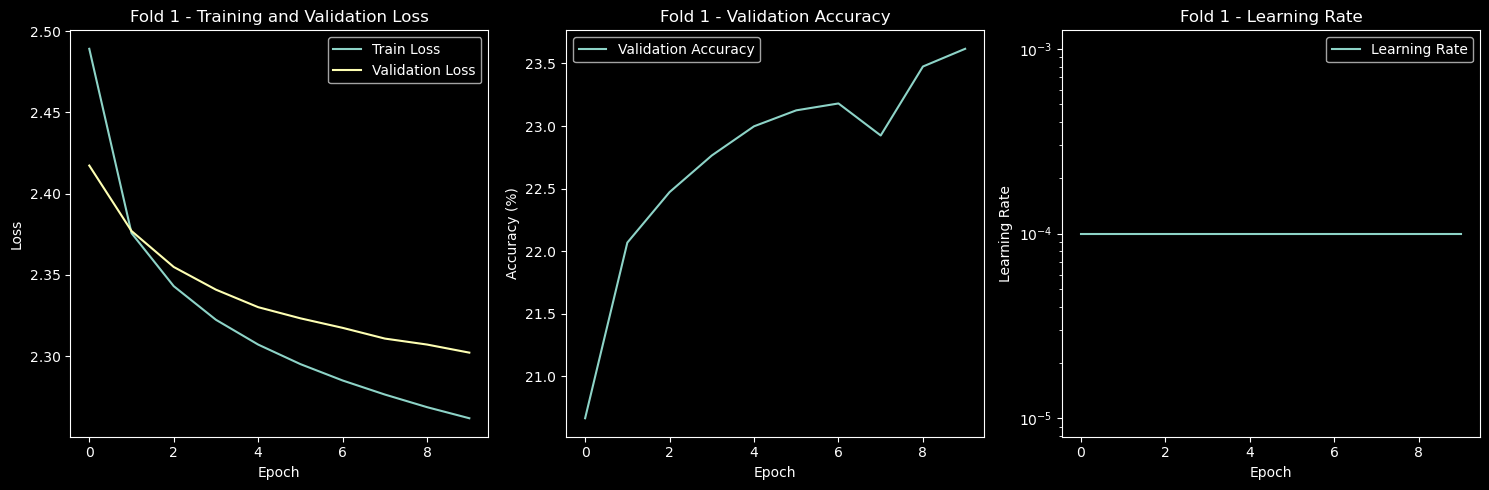


Fold 2
--------------------------------------------------

Epoch 1/10
------------------------------
loss: 2.861510  [   32/459076]
Average gradient norm: 0.297870
loss: 2.861510  [   32/459076]
Average gradient norm: 0.297870
loss: 2.834080  [ 1632/459076]
Average gradient norm: 0.341926
loss: 2.834080  [ 1632/459076]
Average gradient norm: 0.341926
loss: 2.829159  [ 3232/459076]
Average gradient norm: 0.318176
loss: 2.829159  [ 3232/459076]
Average gradient norm: 0.318176
loss: 2.764927  [ 4832/459076]
Average gradient norm: 0.282343
loss: 2.764927  [ 4832/459076]
Average gradient norm: 0.282343
loss: 2.818018  [ 6432/459076]
Average gradient norm: 0.361226
loss: 2.818018  [ 6432/459076]
Average gradient norm: 0.361226
loss: 2.822056  [ 8032/459076]
Average gradient norm: 0.320786
loss: 2.822056  [ 8032/459076]
Average gradient norm: 0.320786
loss: 2.803702  [ 9632/459076]
Average gradient norm: 0.362290
loss: 2.803702  [ 9632/459076]
Average gradient norm: 0.362290
loss: 2.774864  

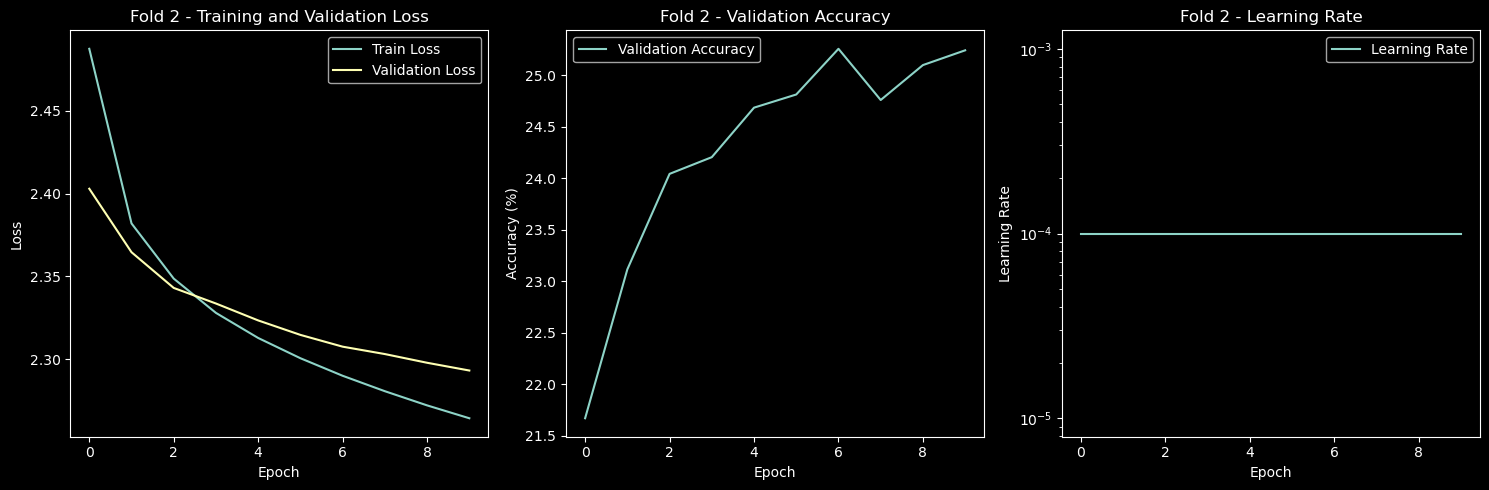


Fold 3
--------------------------------------------------

Epoch 1/10
------------------------------
loss: 3.032710  [   32/463065]
Average gradient norm: 0.351566
loss: 3.032710  [   32/463065]
Average gradient norm: 0.351566
loss: 2.880473  [ 1632/463065]
Average gradient norm: 0.338788
loss: 2.880473  [ 1632/463065]
Average gradient norm: 0.338788
loss: 2.918155  [ 3232/463065]
Average gradient norm: 0.306026
loss: 2.918155  [ 3232/463065]
Average gradient norm: 0.306026
loss: 2.872385  [ 4832/463065]
Average gradient norm: 0.315599
loss: 2.872385  [ 4832/463065]
Average gradient norm: 0.315599
loss: 2.840114  [ 6432/463065]
Average gradient norm: 0.329700
loss: 2.840114  [ 6432/463065]
Average gradient norm: 0.329700
loss: 2.790382  [ 8032/463065]
Average gradient norm: 0.311132
loss: 2.790382  [ 8032/463065]
Average gradient norm: 0.311132
loss: 2.853828  [ 9632/463065]
Average gradient norm: 0.308754
loss: 2.853828  [ 9632/463065]
Average gradient norm: 0.308754
loss: 2.756093  

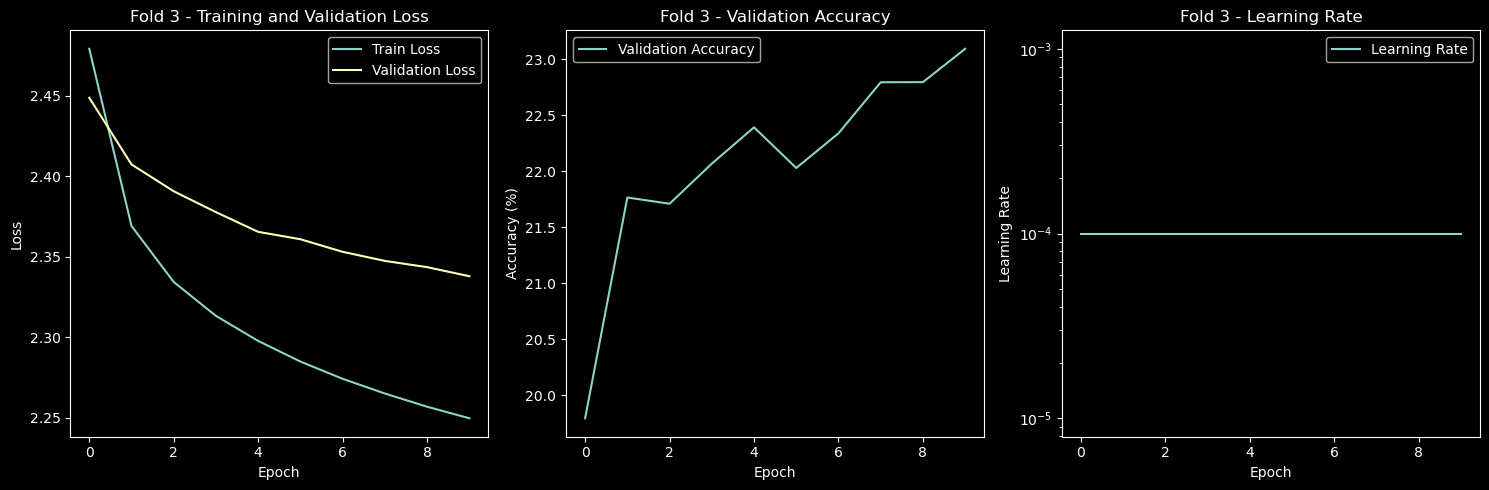


Fold 4
--------------------------------------------------

Epoch 1/10
------------------------------
loss: 2.904774  [   32/459758]
Average gradient norm: 0.314654
loss: 2.904774  [   32/459758]
Average gradient norm: 0.314654
loss: 2.840957  [ 1632/459758]
Average gradient norm: 0.322010
loss: 2.840957  [ 1632/459758]
Average gradient norm: 0.322010
loss: 2.856556  [ 3232/459758]
Average gradient norm: 0.287869
loss: 2.856556  [ 3232/459758]
Average gradient norm: 0.287869
loss: 2.884452  [ 4832/459758]
Average gradient norm: 0.273310
loss: 2.884452  [ 4832/459758]
Average gradient norm: 0.273310
loss: 2.847103  [ 6432/459758]
Average gradient norm: 0.345193
loss: 2.847103  [ 6432/459758]
Average gradient norm: 0.345193
loss: 2.827836  [ 8032/459758]
Average gradient norm: 0.323564
loss: 2.827836  [ 8032/459758]
Average gradient norm: 0.323564
loss: 2.713696  [ 9632/459758]
Average gradient norm: 0.355181
loss: 2.713696  [ 9632/459758]
Average gradient norm: 0.355181
loss: 2.853654  

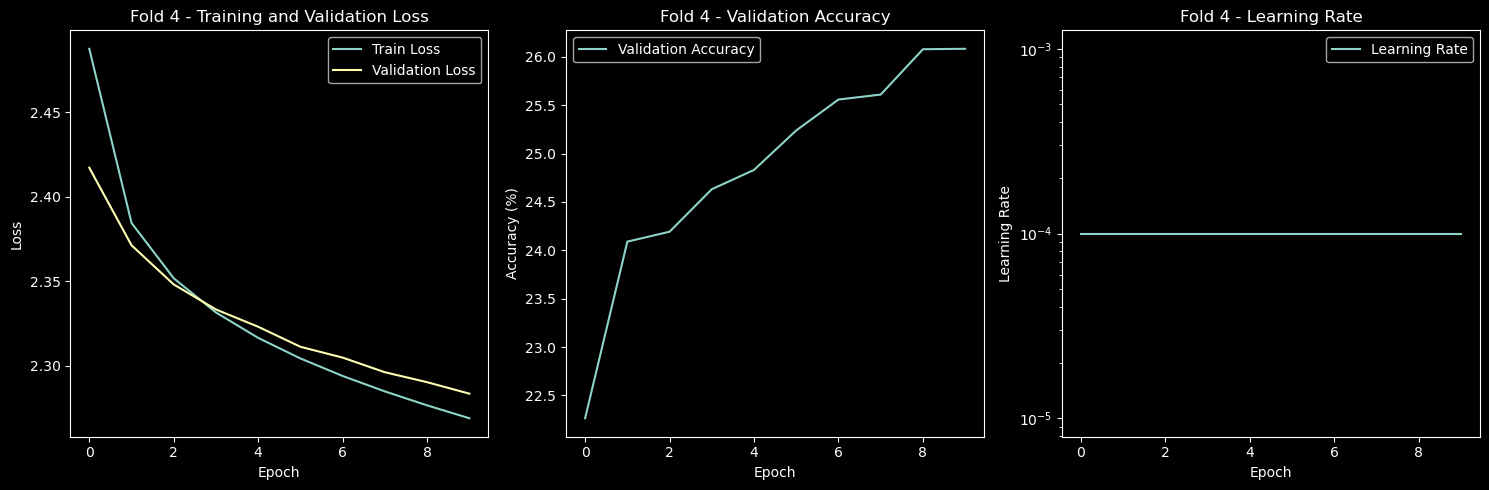


Fold 5
--------------------------------------------------

Epoch 1/10
------------------------------
loss: 2.818838  [   32/457460]
Average gradient norm: 0.338653
loss: 2.818838  [   32/457460]
Average gradient norm: 0.338653
loss: 2.975348  [ 1632/457460]
Average gradient norm: 0.359021
loss: 2.975348  [ 1632/457460]
Average gradient norm: 0.359021
loss: 2.888489  [ 3232/457460]
Average gradient norm: 0.382691
loss: 2.888489  [ 3232/457460]
Average gradient norm: 0.382691
loss: 2.806206  [ 4832/457460]
Average gradient norm: 0.360420
loss: 2.806206  [ 4832/457460]
Average gradient norm: 0.360420
loss: 2.888007  [ 6432/457460]
Average gradient norm: 0.317508
loss: 2.888007  [ 6432/457460]
Average gradient norm: 0.317508
loss: 2.805916  [ 8032/457460]
Average gradient norm: 0.306334
loss: 2.805916  [ 8032/457460]
Average gradient norm: 0.306334
loss: 2.762934  [ 9632/457460]
Average gradient norm: 0.307733
loss: 2.762934  [ 9632/457460]
Average gradient norm: 0.307733
loss: 2.763398  

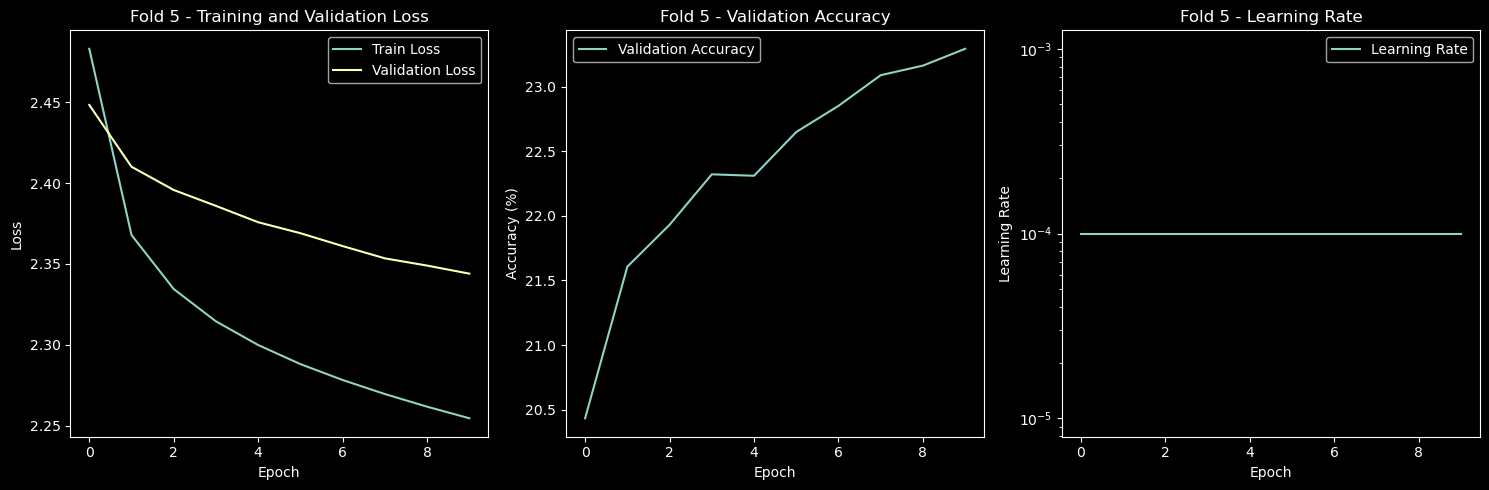


Cross-validation Summary:
--------------------------------------------------
Average validation loss: 2.3122 ± 0.0243
Average validation accuracy: 24.27% ± 1.18%

Best performing fold: 4
Best validation loss: 2.2834
Best validation accuracy: 26.08%

Fold 1:
Best validation loss: 2.3022
Best validation accuracy: 23.62%
Best epoch: 10

Fold 2:
Best validation loss: 2.2933
Best validation accuracy: 25.24%
Best epoch: 10

Fold 3:
Best validation loss: 2.3380
Best validation accuracy: 23.09%
Best epoch: 10

Fold 4:
Best validation loss: 2.2834
Best validation accuracy: 26.08%
Best epoch: 10

Fold 5:
Best validation loss: 2.3440
Best validation accuracy: 23.29%
Best epoch: 10


In [22]:
# Uruchomienie cross-validacji
results = cross_validate(
    model=model,
    dataset=dataset,
    train_df=train_df,
    epochs=epochs,
    batch_size=32,  # Zwiększony batch size dla lepszej stabilności
    learning_rate=learning_rate
)

# Wyświetl wyniki dla każdego foldu
for fold, result in results['fold_results'].items():
    print(f"\nFold {fold+1}:")
    print(f"Best validation loss: {result['best_val_loss']:.4f}")
    print(f"Best validation accuracy: {result['best_val_accuracy']:.2f}%")
    print(f"Best epoch: {result['best_epoch']+1}")

# Uwagi

- Potrzebuje cross validation do sprawnego pogrupowania na treningowe i testowe
- Spróbuj na 2 foldach albo jednym jeszcze tolku bananie
- Dopracuj model na lepsiejszy bo to ładnie już idzie
- Dodaj monitoring z TensorBoard
- Po dobrym modelu idz na rozszerzenie datasetu o TOF i reszte